# CAMPUS ID - XR97612

# Assignment Week 2 

* Answer each question completely. 
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

## Question 1. Determine the number of missing values in each column.

In [2]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

#### Sample narrative description
- transmission has most number of nulls followed by body, condition, trim, model, make, color, interior, odometer and vin

## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [3]:
# check_float() method returns all the values in the column that are not float
def check_float(x):
    if type(x) == float:
        return
    if x.isalpha() == True:
        return x

# checking if all the values in the condition column are float or not
result = df['condition'].apply(check_float)
result = result[result.notnull()]

# result varible all the list of values that are not flaot in the condition column
result

408161    oh
417835    ms
421289    co
424161    ms
427040    fl
427043    fl
434424    fl
444501    sc
453794    fl
461597    ca
461612    pa
492484    ca
497008    fl
497011    fl
499083    in
501455    va
505299    ga
505306    ga
520461    ca
528996    va
529009    pa
529013    ca
529622    ga
548784    wi
551222    fl
554710    tx
Name: condition, dtype: object

In [4]:
# droping all the rows in the dataframe that are not float in the condition column 
df = df.drop(index=result.index)
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
# converting condition and mmr column in their respective datatypes 
df[['condition', 'mmr']] = df[['condition', 'mmr']].apply(pd.to_numeric)

In [6]:
# converting date to the required format
from datetime import datetime
def date_format(x):
    # Extracting the required value saledate column and converting into YYYY-MM-DD format
    return datetime.strptime(' '.join(x.split()[1:-3]),'%b %d %Y').date()
df['saledate'] = df['saledate'].apply(date_format)
df['saledate']

0         2014-12-16
1         2014-12-16
2         2015-01-15
3         2015-01-29
4         2014-12-18
             ...    
558832    2015-07-09
558833    2015-07-08
558834    2015-07-08
558835    2015-07-09
558836    2015-05-28
Name: saledate, Length: 558811, dtype: object

In [7]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

In [8]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014-12-16
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,2014-12-16
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,2015-01-15
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,2015-01-29
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,2014-12-18


#### Sample narrative description
- condition is converted to float
- mmr is converted to int
- saledate is converted to datatime

## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [9]:
# unique is a method that ignores the duplicate values in the 'make' column 
makes = df.make.unique().tolist()

# every value in the list 'makes' is converted into lowercase
makes = [str(x).lower() for x in makes]

# sorted method is used to sort every value in the list in ascending order
sorted(makes)

['acura',
 'acura',
 'airstream',
 'aston martin',
 'audi',
 'audi',
 'bentley',
 'bmw',
 'bmw',
 'buick',
 'buick',
 'cadillac',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chevrolet',
 'chrysler',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc',
 'gmc truck',
 'honda',
 'honda',
 'hummer',
 'hyundai',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'jeep',
 'kia',
 'kia',
 'lamborghini',
 'land rover',
 'land rover',
 'landrover',
 'lexus',
 'lexus',
 'lincoln',
 'lincoln',
 'lotus',
 'maserati',
 'maserati',
 'mazda',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsubishi',
 'nan',
 'nissan',
 'nissan',
 'oldsmobile',
 'oldsmobile',
 'plymouth',
 'plymouth',
 'pontiac',
 'pontiac',
 'porsche',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 's

In the above output we can still see the duplicates which means the unique method considers the uppercase and lowercase of same letter as two different characters as their ascci values are different.

Ex. The ascii value of 'a' is 97 and ascii value of 'A' is 65

To remove the duplicates in the above case follow these steps:
- Convert all the values in the make column into lowercase and then apply unique() method to get desired output without any dupliates

In [10]:
# every value in the list 'makes' is converted into lowercase
new_makes = [str(x).lower() for x in df['make']]

# set is a method that ignores the duplicate values in the new_makes list
new_makes = set(new_makes)

# sorted method is used to sort every value in the list in ascending order
sorted(new_makes)

['acura',
 'airstream',
 'aston martin',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc truck',
 'honda',
 'hummer',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'lamborghini',
 'land rover',
 'landrover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 'nan',
 'nissan',
 'oldsmobile',
 'plymouth',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo',
 'vw']

## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

In [11]:
# the overall correlation
df['mmr'].corr(df['sellingprice'])

0.9836337168977236

In [12]:
# creating list with increasing selling price with a step difference of 10000
selling_price_window = list(range(10000,int(df['sellingprice'].max()) + 10000,10000))
corr = []

# finding correaltion between 
for upper_limit in selling_price_window:
    trimmed_df = df[(df['sellingprice'] >= 0) & (df['sellingprice'] <= upper_limit)]
    corr.append(trimmed_df['mmr'].corr(df['sellingprice']))
corr
# from the below output we can say that correlation between mmr and selling price increased as the window size of selling price increases


[0.874354272124959,
 0.9584428323123206,
 0.9744203460442996,
 0.9791682459086513,
 0.9812713466602431,
 0.9822401960311035,
 0.9827082643538264,
 0.9831862576819893,
 0.9834269274590417,
 0.983576112833006,
 0.9835897120182308,
 0.9836722973053647,
 0.9837452115182942,
 0.9838139061890898,
 0.983887381457844,
 0.9839572313793212,
 0.9840077311787878,
 0.9840226043763779,
 0.9840312414363541,
 0.9840312414363541,
 0.9840312414363541,
 0.9840312414363541,
 0.9836337168977236]

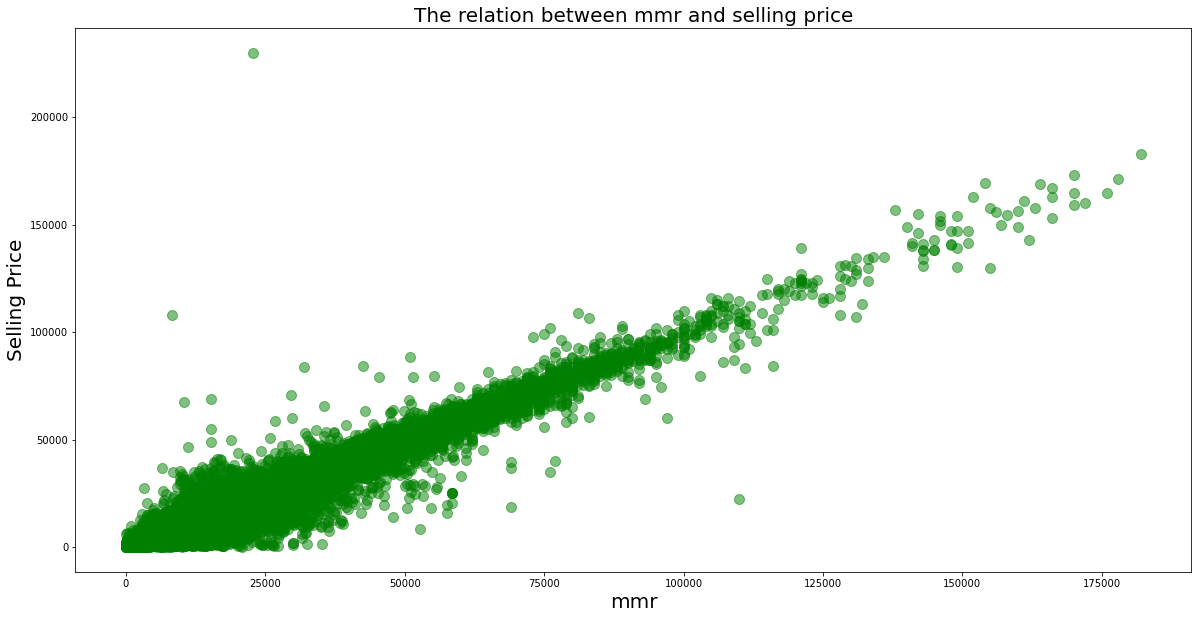

In [13]:
# Plot that shows the relation between mmr and selling price
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.scatter(df['mmr'],df['sellingprice'],s=100,c='green',alpha=0.5)
plt.xlabel('mmr',fontsize=20)
plt.ylabel('Selling Price',fontsize=20)
plt.title('The relation between mmr and selling price',fontsize=20)
plt.show()
# from the below output we can say that there is a positive correlation between mmr and selling price as the graph linearly increased

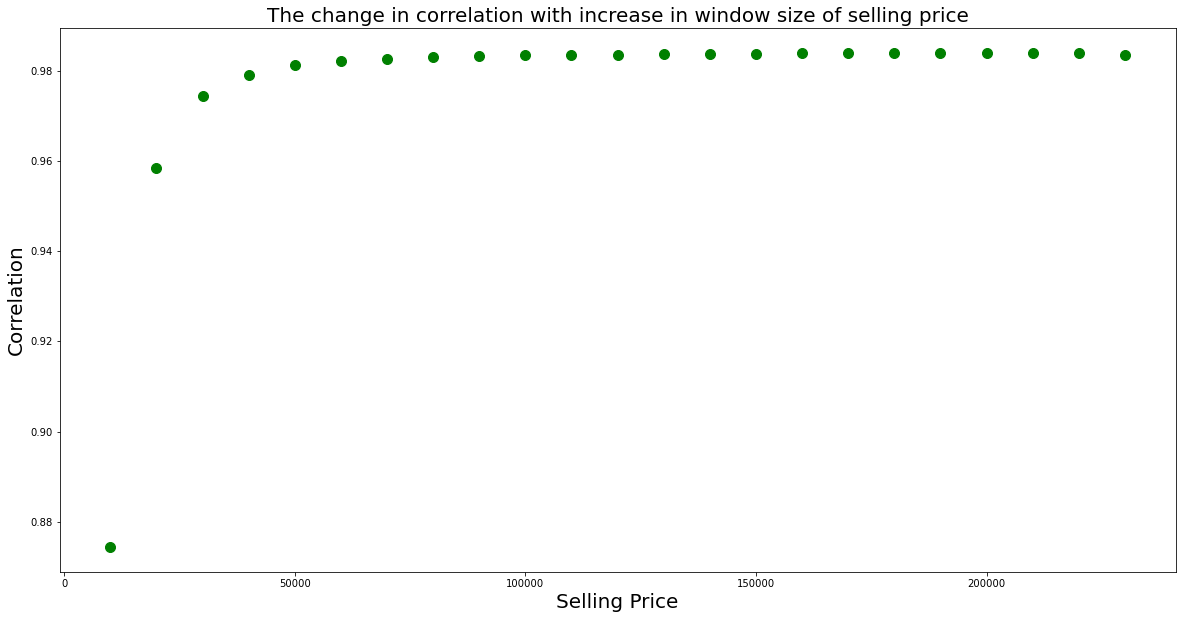

In [14]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.scatter(selling_price_window,corr,s=100,c='green')
plt.xlabel('Selling Price',fontsize=20)
plt.ylabel('Correlation',fontsize=20)
plt.title('The change in correlation with increase in window size of selling price',fontsize=20)
plt.show()
# the correlation increased as the window size of selling price increased

#### Sample narrative description
- the correlation increased as the window size of selling price increased 
- Positive relation between mmr and correlation

## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

In [15]:
# converting all the values in the make column into lowercase
df['make'] = df['make'].apply(lambda x: str(x).lower())

In [16]:
# pulling the top 10 most common maker names
common_makers = df['make'].value_counts().reset_index().sort_values(by = 'make',ascending=False).head(10) 
common_makers

,index,make
0,ford,93997
1,chevrolet,60587
2,nissan,54017
3,toyota,39966
4,dodge,30955
5,honda,27351
6,hyundai,21836
7,bmw,20793
8,kia,18084
9,chrysler,17485


In [17]:
# pulling the records of top 10 most common makers from the dataframe 
new_df = df[df['make'].isin(common_makers['index'])][['year','make','sellingprice']]

# Filtering the records from year 2010 to 2015 
new_df = new_df[(new_df['year'] >=2010) & (new_df['year'] <=2015)]
new_df

,year,make,sellingprice
0,2015,kia,21500
1,2015,kia,21500
2,2014,bmw,30000
4,2014,bmw,67000
5,2015,nissan,10900
...,...,...,...
558831,2011,bmw,22800
558832,2015,kia,33000
558834,2012,bmw,34000
558835,2015,nissan,11100


In [18]:
# creating new column named sellingprice bin and filling the column with the result of new_df['sellingprice']/10000
new_df['sellingprice bin'] = (new_df['sellingprice']/10000).astype(int)
new_df

,year,make,sellingprice,sellingprice bin
0,2015,kia,21500,2
1,2015,kia,21500,2
2,2014,bmw,30000,3
4,2014,bmw,67000,6
5,2015,nissan,10900,1
...,...,...,...,...
558831,2011,bmw,22800,2
558832,2015,kia,33000,3
558834,2012,bmw,34000,3
558835,2015,nissan,11100,1


In [19]:
# Pivoting the table with sellingprice bin  as index, years as columns and values as count of selling price with correspoding 
# year and sellingprice bin
pivot_df = new_df.pivot_table(index='sellingprice bin', columns='year', values='sellingprice', aggfunc='count')
pivot_df

year,2010,2011,2012,2013,2014,2015
sellingprice bin,,,,,,
0,10005.0,10427.0,13711.0,10225.0,2749.0,331.0
1,6778.0,16471.0,45737.0,50180.0,42745.0,2493.0
2,1600.0,5133.0,9298.0,12112.0,13091.0,1988.0
3,196.0,719.0,2415.0,2449.0,3528.0,906.0
4,11.0,91.0,610.0,487.0,826.0,637.0
5,5.0,11.0,43.0,150.0,334.0,303.0
6,3.0,NaN,11.0,43.0,152.0,30.0
7,NaN,NaN,1.0,21.0,68.0,33.0
8,NaN,NaN,NaN,NaN,19.0,20.0


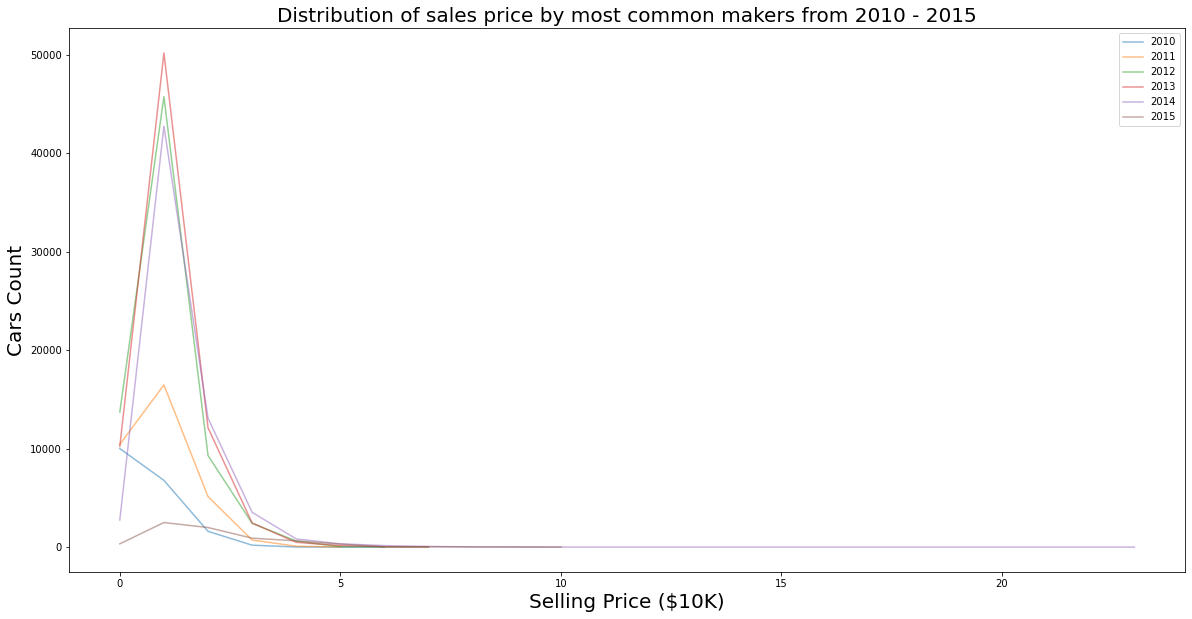

In [20]:
pivot_df.plot(alpha=0.5,figsize=(20,10))
plt.legend()
plt.title('Distribution of sales price by most common makers from 2010 - 2015',fontsize=20)
plt.xlabel('Selling Price ($10K)',fontsize=20)
plt.ylabel('Cars Count',fontsize=20)
plt.show()

- Most of the cars sold below price range of $50K
- Large no.of cars are sold in year 2013
- In year 2015 the cars sold were drastically decreased

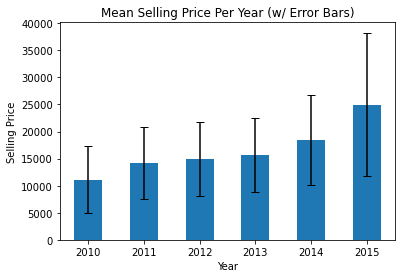

In [21]:
# calculating Mean Selling Price Per Year (2010 - 2015)
yrAvg = new_df.groupby('year')['sellingprice'].mean()  # mean of selling price per year
yrErr = new_df.groupby('year')['sellingprice'].std()   # std of selling price per year

fig, ax = plt.subplots() 
yrAvg.plot.bar(yerr=yrErr, ax=ax, capsize=4, rot=0)
plt.title('Mean Selling Price Per Year (w/ Error Bars)')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

- Mean selling price is highest in the 2015 as the no.of cars sold were less
- Mean selling price increased from 2010 to 2015
- Std increased from 2010 to 2015

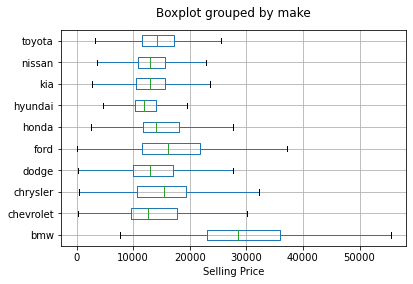

In [22]:
# BoxPlot grouped by maker
new_df.boxplot(column='sellingprice', by='make', vert=False, showfliers=False)
plt.title('')
plt.xlabel('Selling Price')
plt.show()

- BMW has the highest median of selling price and hundai the least
- BMW has highest interquatile range and hundai the least